# Initialisation du Notebook

In [ ]:
# Importation des bibliothèques nécessaires
# !pip install ultralytics # Décommentez cette ligne si vous avez une erreur
from ultralytics import YOLO
import gc
import torch
import matplotlib.pyplot as plt
import pandas as pd
import os

# Initialisation du Drive
from google.colab import drive
drive.mount('/content/drive')

drive_path = '/content/drive/My Drive/'

Mounted at /content/drive


# Entraînement du modèle

In [ ]:
# Chargement du modèle pré-entraîné
model = YOLO("yolo11l.pt")

100%|██████████| 49.0M/49.0M [00:00<00:00, 295MB/s]


In [ ]:
# Optimisation des hyperparamètres de coloration de l'image
best_score = 0.0
best_params = {}

for hsv_h_val in [0.005, 0.01, 0.015]:
    for hsv_s_val in [0.5, 0.7, 0.9]:
        for hsv_v_val in [0.2, 0.4, 0.6]:
            train_results = model.train(
                data=drive_path + "Computer Vision/Projet/data/data.yaml",
                epochs=20,
                imgsz=736,
                device=0,
                batch=8,
                half=True,
                mosaic=1.0,
                hsv_h=hsv_h_val,
                hsv_s=hsv_s_val,
                hsv_v=hsv_v_val,
            )
            current_score = train_results.results_dict.get("metrics/mAP50-95(B)")

            if current_score > best_score:
                best_score = current_score
                best_params = {
                    "hsv_h": hsv_h_val,
                    "hsv_s": hsv_s_val,
                    "hsv_v": hsv_v_val,
                }

            del train_results
            gc.collect()
            torch.cuda.empty_cache()

print("Best Score:", best_score)
print("Best Hyperparameters:", best_params)

In [ ]:
# Entraînement du modèle avec les hyperparamètres optimisés
train_results = model.train(
    data=drive_path + "Computer Vision/Projet/data/data.yaml",
    epochs=30,
    imgsz=736,
    device=0,
    batch=8,
    half=True,
    mosaic=1.0,
    hsv_h=0.005,
    hsv_s=0.7,
    hsv_v=0.4,
)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/drive/My Drive/Computer Vision/Projet/data/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=736, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]


Overriding model.yaml nc=80 with nc=27

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1IBh2XGF-9xpWoGhYCfeyyd1hyx8wcT1_/Computer Vision/Projet/data/train/labels.cache... 476 images, 0 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1IBh2XGF-9xpWoGhYCfeyyd1hyx8wcT1_/Computer Vision/Projet/data/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000323, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.5G      1.141      3.634      1.413        232        736: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        102       1338      0.582        0.2      0.176      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      14.5G     0.9352      2.093      1.195        221        736: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        102       1338      0.349      0.555      0.424      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.4G      0.916      1.634      1.196        228        736: 100%|██████████| 30/30 [00:32<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all        102       1338      0.572      0.489      0.503      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      14.5G     0.8846      1.349      1.175        289        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        102       1338      0.697      0.569      0.632      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      14.4G     0.8557      1.234      1.153        242        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        102       1338      0.639      0.578       0.62      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      14.4G     0.8584      1.137      1.155        218        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        102       1338      0.733      0.572      0.647      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      14.5G     0.8392      1.024      1.139        210        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        102       1338      0.737      0.626      0.687      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      14.6G     0.8236     0.9344      1.115        184        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        102       1338      0.618      0.717      0.753      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      14.4G     0.8049      0.885      1.113        289        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        102       1338      0.745      0.732      0.787      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      14.5G     0.7976     0.8276       1.11        286        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


                   all        102       1338      0.769      0.696      0.787      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      14.4G     0.7747     0.7902      1.108        228        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        102       1338       0.72       0.74      0.778      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      14.5G      0.803     0.7734      1.133        145        736: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        102       1338        0.8      0.683      0.796      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.4G     0.7931     0.7193       1.12        250        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        102       1338      0.834      0.763      0.816      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      14.4G     0.7715     0.6977      1.096        221        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        102       1338       0.86      0.756      0.855      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      14.4G     0.7521     0.6412      1.081        223        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        102       1338      0.824      0.787      0.827      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      14.4G     0.7296     0.6098      1.066        265        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        102       1338      0.781      0.802      0.859      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      14.4G     0.7322     0.5996      1.073        257        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        102       1338      0.799      0.785      0.825      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      14.5G     0.7406     0.5855      1.084        265        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        102       1338      0.837       0.78      0.848      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      14.5G     0.7068     0.5487      1.052        362        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        102       1338      0.826      0.821      0.877      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      14.5G     0.7036     0.5179      1.049        218        736: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        102       1338      0.829      0.839      0.891      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      14.5G     0.6832     0.5131      1.085        196        736: 100%|██████████| 30/30 [00:33<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        102       1338      0.872       0.79      0.882      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      14.6G     0.6683       0.46      1.077        184        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        102       1338      0.873      0.832      0.889      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      14.5G     0.6584     0.4496       1.06        136        736: 100%|██████████| 30/30 [00:31<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        102       1338      0.872      0.832        0.9      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      14.6G     0.6408     0.4305      1.057        126        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        102       1338      0.819      0.861      0.897       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      14.4G     0.6411     0.4313      1.049        155        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        102       1338      0.842      0.828      0.872      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      14.5G     0.6352     0.3927      1.036        197        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


                   all        102       1338      0.881      0.837      0.916      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      14.5G     0.6239     0.3826      1.043        128        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        102       1338      0.889      0.824      0.915       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      14.6G     0.6089     0.3581      1.024        151        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


                   all        102       1338      0.899      0.829       0.92      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      14.5G      0.608     0.3557      1.028        194        736: 100%|██████████| 30/30 [00:31<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        102       1338      0.902      0.831      0.922      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      14.5G     0.6045     0.3505      1.032        150        736: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


                   all        102       1338      0.871      0.855      0.923      0.748

30 epochs completed in 0.314 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,300,129 parameters, 0 gradients, 86.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all        102       1338      0.871      0.855      0.923      0.748
                Bakery          8         64      0.834      0.944      0.971      0.671
              Biscuits          8         68      0.838      0.971      0.988      0.823
               Bombons          4         26      0.796        0.9      0.946      0.775
                Canned          4         89      0.728      0.482      0.668      0.447
               Cereals          7         63      0.834      0.683      0.891       0.78
                Cheese          5         68      0.915      0.779      0.909      0.694
                 Chips          2         24      0.671      0.958      0.929      0.616
                 Choco          3         31      0.968      0.992      0.992      0.912
                Coffee          7         91      0.989      0.997      0.994      0.871
    DriedFruitsAndNuts          1          3       0.62          1      0.995      0.995
                IceTe

# Évaluation du modèle

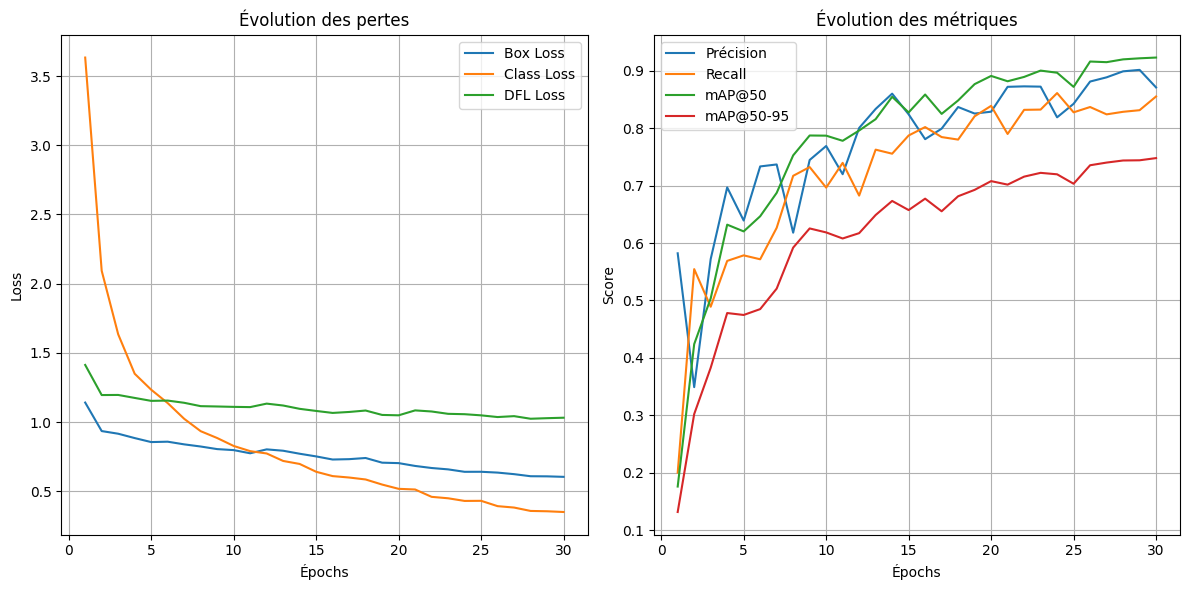

In [ ]:
# Chargement des résultats
csv_path = "/content/runs/detect/train/results.csv" # Chemin du fichier CSV
df = pd.read_csv(csv_path)

# Affichage des résultats
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.title("Évolution des pertes")
plt.legend()
plt.grid()

# Précision, Recall et mAP
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Précision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")
plt.xlabel("Épochs")
plt.ylabel("Score")
plt.title("Évolution des métriques")
plt.legend()
plt.grid()

# Affichage du graphique
plt.tight_layout()
plt.show()

In [ ]:
# Exportation du modèle
model.export(format='onnx', device=0, save_dir=drive_path + "Computer Vision/Projet/model.onnx")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,300,129 parameters, 0 gradients, 86.7 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 736, 736) BCHW and output shape(s) (1, 31, 11109) (48.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 264.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 315.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 268.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 231.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 273.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 24.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command

'runs/detect/train/weights/best.onnx'